# Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset

In [2]:
aprdata=pd.read_csv('uber-raw-data-apr14.csv')
maydata=pd.read_csv('uber-raw-data-may14.csv')
jundata=pd.read_csv('uber-raw-data-jun14.csv')
juldata=pd.read_csv('uber-raw-data-jul14.csv')
augdata=pd.read_csv('uber-raw-data-aug14.csv')
sepdata=pd.read_csv('uber-raw-data-sep14.csv')

# Data Preprocessing of APRIL

In [3]:
# Convert Date/Time to datetime object
aprdata['date/time']=pd.to_datetime(aprdata['Date/Time'])

In [4]:
#Extracting useful information from Date/Time
aprdata['aprhour']=aprdata['date/time'].dt.hour
aprdata['aprday']=aprdata['date/time'].dt.day
aprdata['aprdayofweek']=aprdata['date/time'].dt.dayofweek
aprdata['aprmonth']=aprdata['date/time'].dt.month

In [5]:
# Display basic info about the dataset
print(aprdata.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564516 entries, 0 to 564515
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Date/Time     564516 non-null  object        
 1   Lat           564516 non-null  float64       
 2   Lon           564516 non-null  float64       
 3   Base          564516 non-null  object        
 4   date/time     564516 non-null  datetime64[ns]
 5   aprhour       564516 non-null  int32         
 6   aprday        564516 non-null  int32         
 7   aprdayofweek  564516 non-null  int32         
 8   aprmonth      564516 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(4), object(2)
memory usage: 30.1+ MB
None


In [6]:
print(aprdata)

                 Date/Time      Lat      Lon    Base           date/time  \
0         4/1/2014 0:11:00  40.7690 -73.9549  B02512 2014-04-01 00:11:00   
1         4/1/2014 0:17:00  40.7267 -74.0345  B02512 2014-04-01 00:17:00   
2         4/1/2014 0:21:00  40.7316 -73.9873  B02512 2014-04-01 00:21:00   
3         4/1/2014 0:28:00  40.7588 -73.9776  B02512 2014-04-01 00:28:00   
4         4/1/2014 0:33:00  40.7594 -73.9722  B02512 2014-04-01 00:33:00   
...                    ...      ...      ...     ...                 ...   
564511  4/30/2014 23:22:00  40.7640 -73.9744  B02764 2014-04-30 23:22:00   
564512  4/30/2014 23:26:00  40.7629 -73.9672  B02764 2014-04-30 23:26:00   
564513  4/30/2014 23:31:00  40.7443 -73.9889  B02764 2014-04-30 23:31:00   
564514  4/30/2014 23:32:00  40.6756 -73.9405  B02764 2014-04-30 23:32:00   
564515  4/30/2014 23:48:00  40.6880 -73.9608  B02764 2014-04-30 23:48:00   

        aprhour  aprday  aprdayofweek  aprmonth  
0             0       1             1

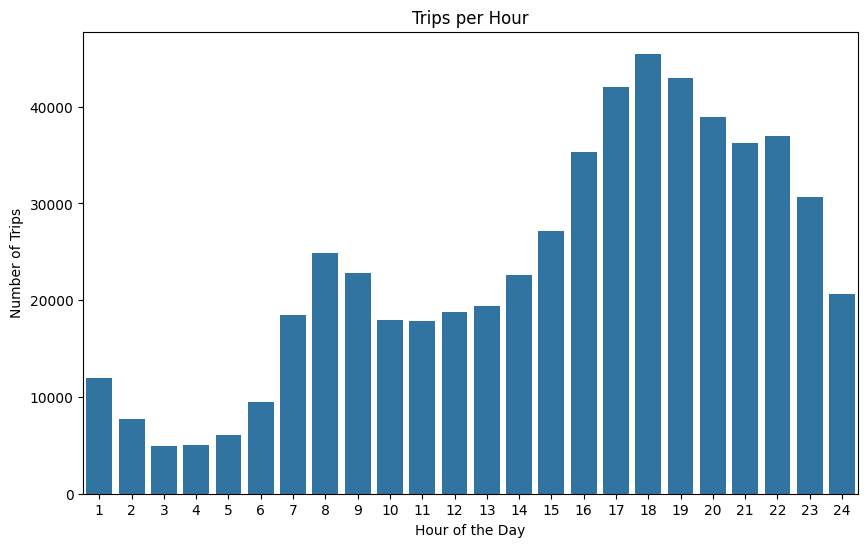

In [7]:
#Exploratory Data Analysis
#Plotting the number of trips per hour
plt.figure(figsize=(10,6))
ax=sns.countplot(x=aprdata['aprhour'] )
ax.set_xticks(range(24))  
ax.set_xticklabels(range(1,25))
plt.title('Trips per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.show()

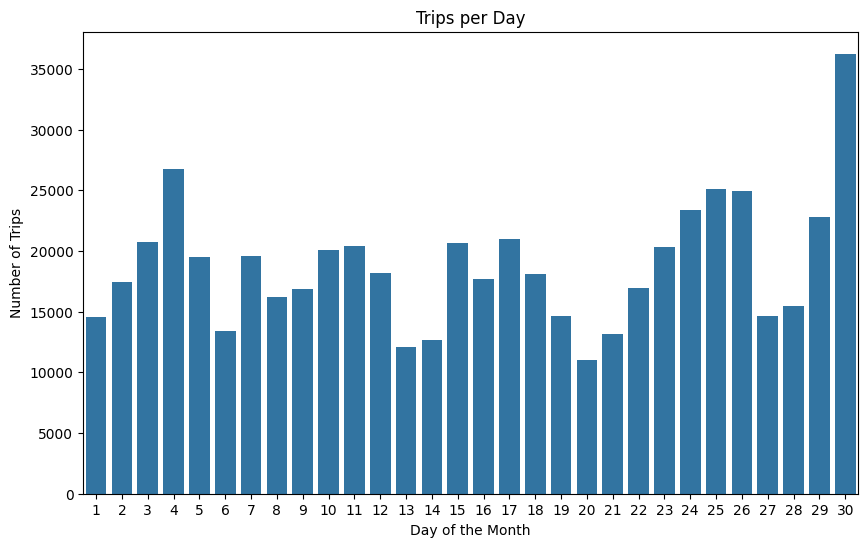

In [8]:
# Plotting the number of trips per day
plt.figure(figsize=(10,6))
sns.countplot(x='aprday',data=aprdata)
plt.xticks(ticks=range(0, 30), labels=map(str, range(1, 31)))
plt.title('Trips per Day')
plt.xlabel('Day of the Month')
plt.ylabel('Number of Trips')
plt.show()

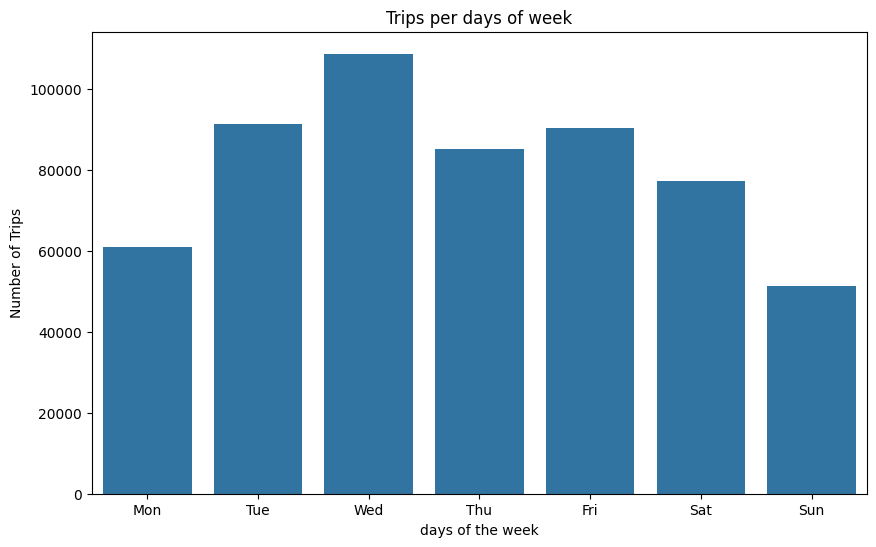

In [9]:
# Plotting the number of trips per day of the week
plt.figure(figsize=(10,6))
sns.countplot(x='aprdayofweek',data=aprdata)
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.title('Trips per days of week')
plt.xlabel('days of the week')
plt.ylabel('Number of Trips')
plt.show()

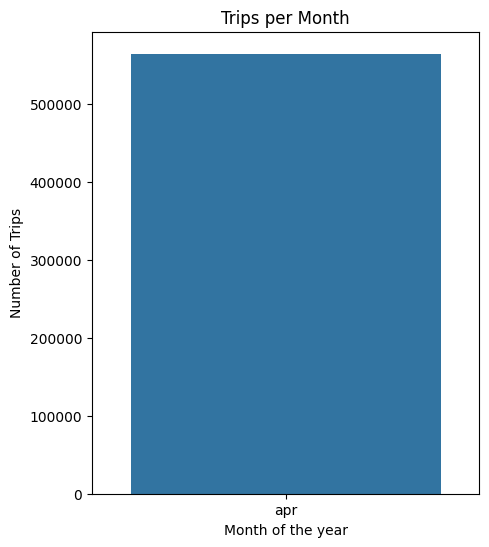

In [10]:
# Plotting the number of trips per month
plt.figure(figsize=(5,6))
sns.countplot(x='aprmonth',data=aprdata)
plt.xticks(ticks=range(1), labels=['apr'])
plt.title('Trips per Month')
plt.xlabel('Month of the year')
plt.ylabel('Number of Trips')
plt.show()

# Model Training and Evaluation

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Parameters: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best CV Score (MSE): 23743.586566549096
Mean Squared Error (MSE): 16693.667416148986
R² Score: 0.9541666432387294
Mean Absolute Error (MAE): 85.24301653439154


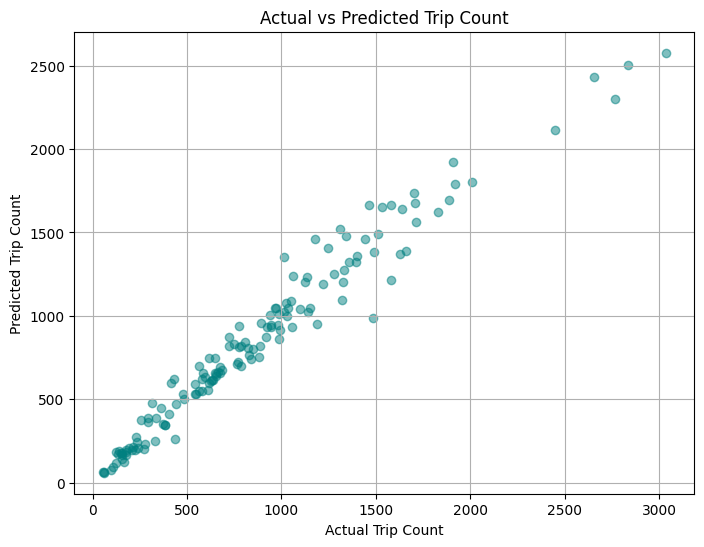

C:\Users\ARJAV JAIN\AppData\Local\Temp\ipykernel_864\1247056991.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances.values, y=feature_importances.index, palette="viridis")


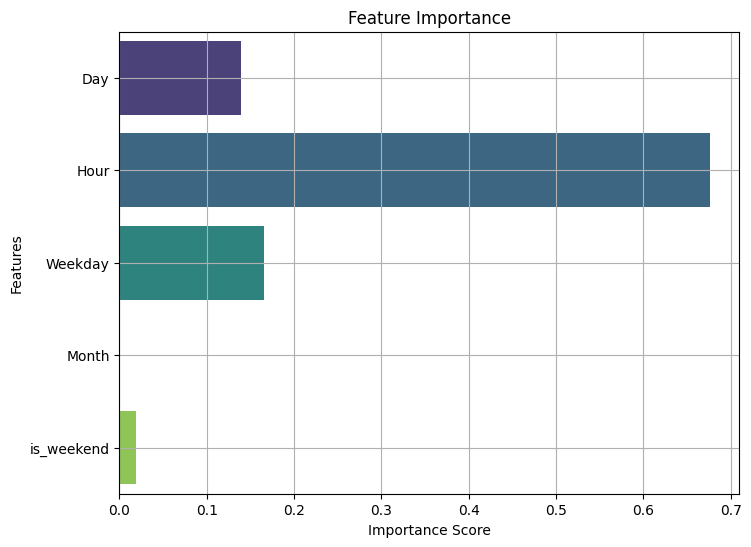

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Load dataset
df = pd.read_csv("uber-raw-data-apr14.csv")

# Parse datetime and create features
df['Date/Time'] = pd.to_datetime(df['Date/Time'])
df['Hour'] = df['Date/Time'].dt.hour
df['Weekday'] = df['Date/Time'].dt.weekday
df['Day'] = df['Date/Time'].dt.day
df['Month'] = df['Date/Time'].dt.month
df['is_weekend'] = df['Weekday'].apply(lambda x: 1 if x >= 5 else 0)

# Aggregate trip counts
grouped = df.groupby(['Day', 'Hour', 'Weekday', 'Month', 'is_weekend']).size().reset_index(name='Trip_Count')

# Features and target
X = grouped[['Day', 'Hour', 'Weekday', 'Month', 'is_weekend']]
y = grouped['Trip_Count']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 15, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Random Forest with GridSearchCV
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=3, scoring='neg_mean_squared_error',
                           n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Best model
print("Best Parameters:", grid_search.best_params_)
print("Best CV Score (MSE):", -grid_search.best_score_)

best_model = grid_search.best_estimator_

# Predictions
y_pred = best_model.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)
print("Mean Absolute Error (MAE):", mae)

# Plot: Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='teal')
plt.xlabel("Actual Trip Count")
plt.ylabel("Predicted Trip Count")
plt.title("Actual vs Predicted Trip Count")
plt.grid(True)
plt.show()

# Feature Importance Plot
plt.figure(figsize=(8, 6))
feature_importances = pd.Series(best_model.feature_importances_, index=X.columns)
sns.barplot(x=feature_importances.values, y=feature_importances.index, palette="viridis")
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.grid(True)
plt.show()


# Data Preprocessing of MAY

In [12]:
maydata['date/time']=pd.to_datetime(maydata['Date/Time'])

In [13]:
maydata['mayhour']=maydata['date/time'].dt.hour
maydata['mayday']=maydata['date/time'].dt.day
maydata['maydayofweek']=maydata['date/time'].dt.dayofweek
maydata['maymonth']=maydata['date/time'].dt.month

In [14]:
print(maydata.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652435 entries, 0 to 652434
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Date/Time     652435 non-null  object        
 1   Lat           652435 non-null  float64       
 2   Lon           652435 non-null  float64       
 3   Base          652435 non-null  object        
 4   date/time     652435 non-null  datetime64[ns]
 5   mayhour       652435 non-null  int32         
 6   mayday        652435 non-null  int32         
 7   maydayofweek  652435 non-null  int32         
 8   maymonth      652435 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(4), object(2)
memory usage: 34.8+ MB
None


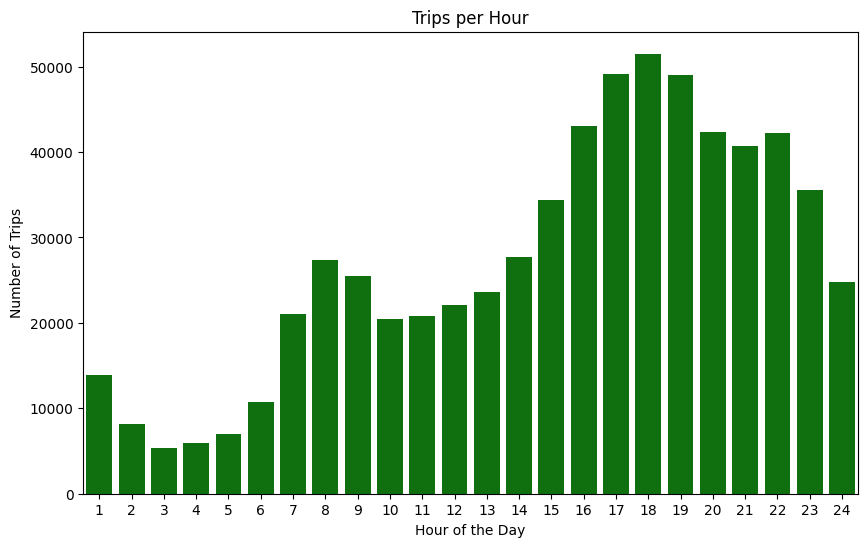

In [15]:
plt.figure(figsize=(10,6))
ax=sns.countplot(x=maydata['mayhour'],color='green' )
ax.set_xticks(range(24))  
ax.set_xticklabels(range(1,25))
plt.title('Trips per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.show()

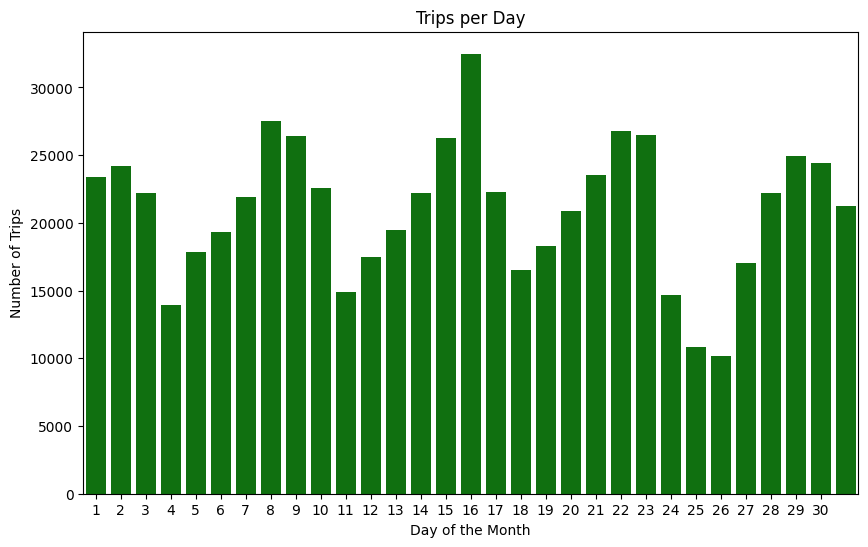

In [16]:
plt.figure(figsize=(10,6))
sns.countplot(x='mayday',data=maydata,color='green')
plt.xticks(ticks=range(0, 30), labels=map(str, range(1, 31)))
plt.title('Trips per Day')
plt.xlabel('Day of the Month')
plt.ylabel('Number of Trips')
plt.show()

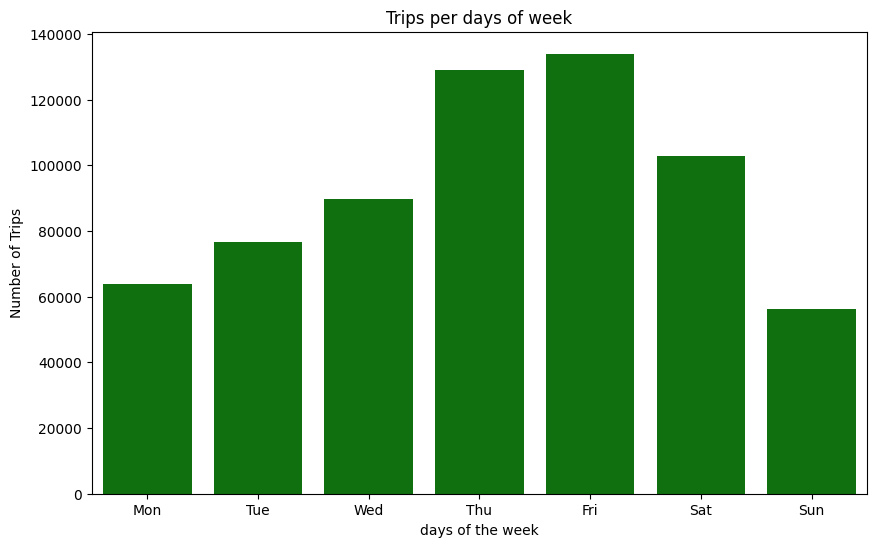

In [17]:
plt.figure(figsize=(10,6))
sns.countplot(x='maydayofweek',data=maydata,color='green')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.title('Trips per days of week')
plt.xlabel('days of the week')
plt.ylabel('Number of Trips')
plt.show()

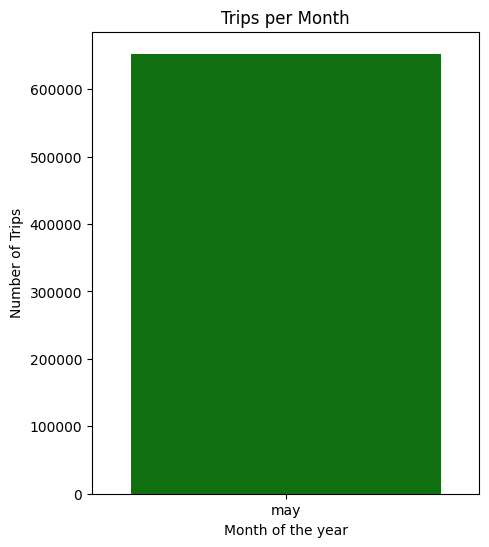

In [18]:
plt.figure(figsize=(5,6))
sns.countplot(x='maymonth',data=maydata,color='green')
plt.xticks(ticks=range(1), labels=['may'])
plt.title('Trips per Month')
plt.xlabel('Month of the year')
plt.ylabel('Number of Trips')
plt.show()

# Model Training and Evaluation

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best CV Score (MSE): 28487.843660853934
Mean Squared Error (MSE): 14499.607834899329
R² Score: 0.9573790131157793
Mean Absolute Error (MAE): 81.2220134228188


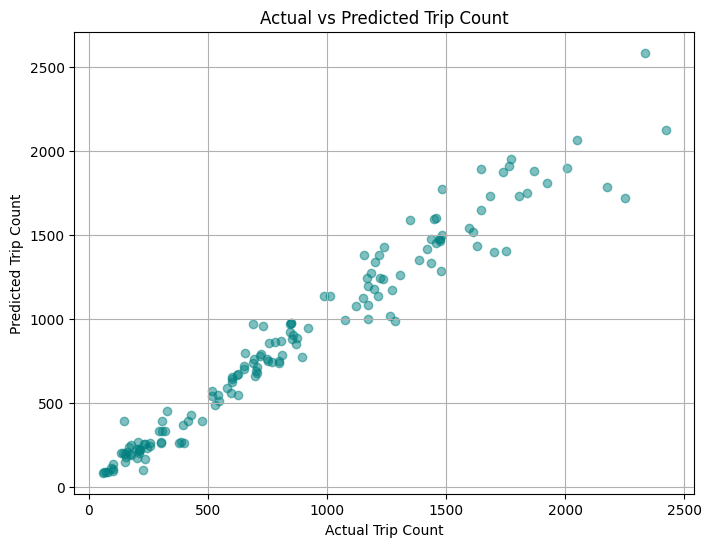

C:\Users\ARJAV JAIN\AppData\Local\Temp\ipykernel_864\2172641900.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances.values, y=feature_importances.index, palette="viridis")


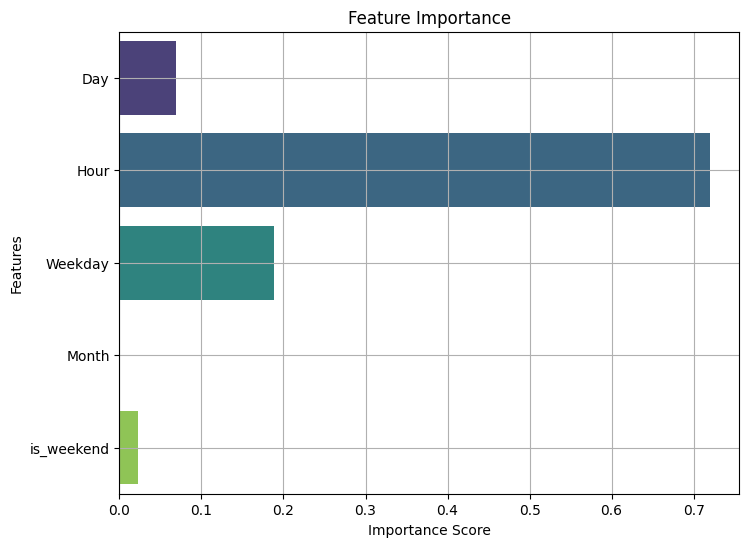

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Load dataset
df = pd.read_csv("uber-raw-data-may14.csv")

# Parse datetime and create features
df['Date/Time'] = pd.to_datetime(df['Date/Time'])
df['Hour'] = df['Date/Time'].dt.hour
df['Weekday'] = df['Date/Time'].dt.weekday
df['Day'] = df['Date/Time'].dt.day
df['Month'] = df['Date/Time'].dt.month
df['is_weekend'] = df['Weekday'].apply(lambda x: 1 if x >= 5 else 0)

# Aggregate trip counts
grouped = df.groupby(['Day', 'Hour', 'Weekday', 'Month', 'is_weekend']).size().reset_index(name='Trip_Count')

# Features and target
X = grouped[['Day', 'Hour', 'Weekday', 'Month', 'is_weekend']]
y = grouped['Trip_Count']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 15, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Random Forest with GridSearchCV
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=3, scoring='neg_mean_squared_error',
                           n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Best model
print("Best Parameters:", grid_search.best_params_)
print("Best CV Score (MSE):", -grid_search.best_score_)

best_model = grid_search.best_estimator_

# Predictions
y_pred = best_model.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)
print("Mean Absolute Error (MAE):", mae)

# Plot: Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='teal')
plt.xlabel("Actual Trip Count")
plt.ylabel("Predicted Trip Count")
plt.title("Actual vs Predicted Trip Count")
plt.grid(True)
plt.show()

# Feature Importance Plot
plt.figure(figsize=(8, 6))
feature_importances = pd.Series(best_model.feature_importances_, index=X.columns)
sns.barplot(x=feature_importances.values, y=feature_importances.index, palette="viridis")
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.grid(True)
plt.show()


# Data Preprocessing of JUNE

In [19]:
jundata['date/time']=pd.to_datetime(jundata['Date/Time'])

In [20]:
jundata['junhour']=jundata['date/time'].dt.hour
jundata['junday']=jundata['date/time'].dt.day
jundata['jundayofweek']=jundata['date/time'].dt.dayofweek
jundata['junmonth']=jundata['date/time'].dt.month

In [21]:
print(jundata.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663844 entries, 0 to 663843
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Date/Time     663844 non-null  object        
 1   Lat           663844 non-null  float64       
 2   Lon           663844 non-null  float64       
 3   Base          663844 non-null  object        
 4   date/time     663844 non-null  datetime64[ns]
 5   junhour       663844 non-null  int32         
 6   junday        663844 non-null  int32         
 7   jundayofweek  663844 non-null  int32         
 8   junmonth      663844 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(4), object(2)
memory usage: 35.5+ MB
None


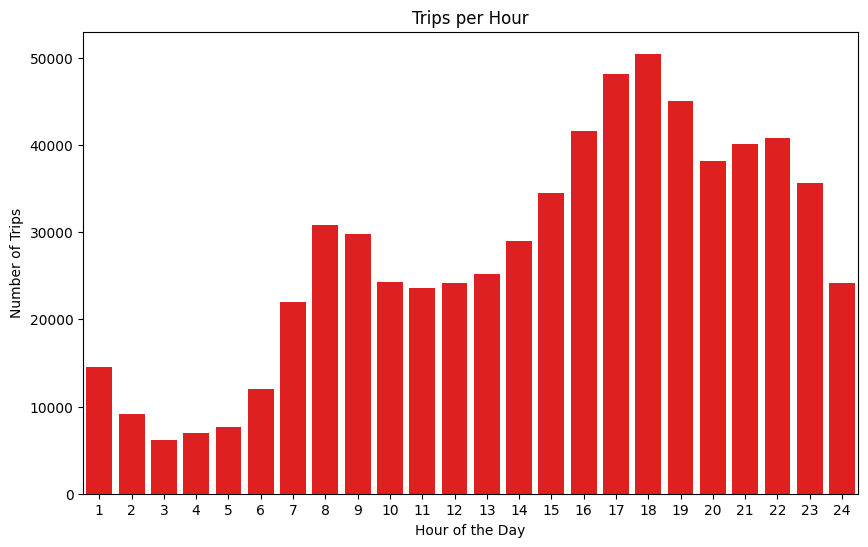

In [22]:
plt.figure(figsize=(10,6))
ax=sns.countplot(x=jundata['junhour'],color='red' )
ax.set_xticks(range(24))  
ax.set_xticklabels(range(1,25))
plt.title('Trips per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.show()

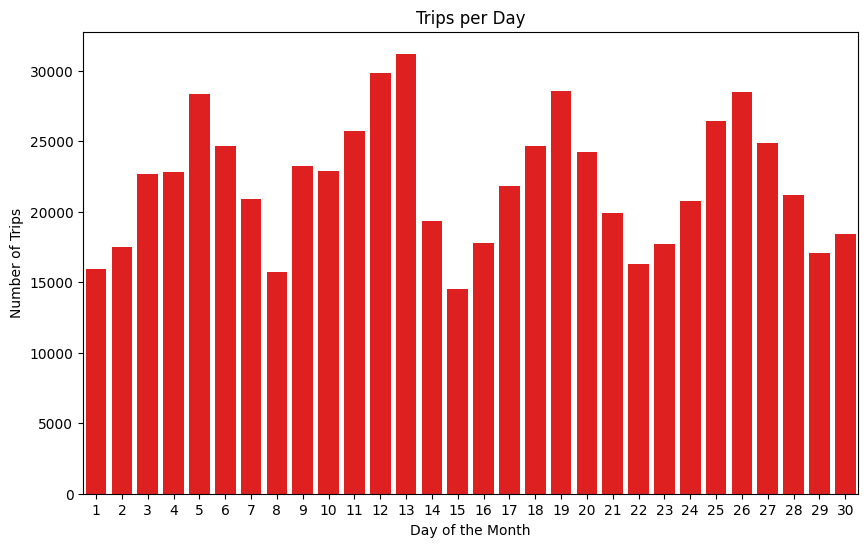

In [23]:
plt.figure(figsize=(10,6))
sns.countplot(x='junday',data=jundata,color='red')
plt.xticks(ticks=range(0, 30), labels=map(str, range(1, 31)))
plt.title('Trips per Day')
plt.xlabel('Day of the Month')
plt.ylabel('Number of Trips')
plt.show()

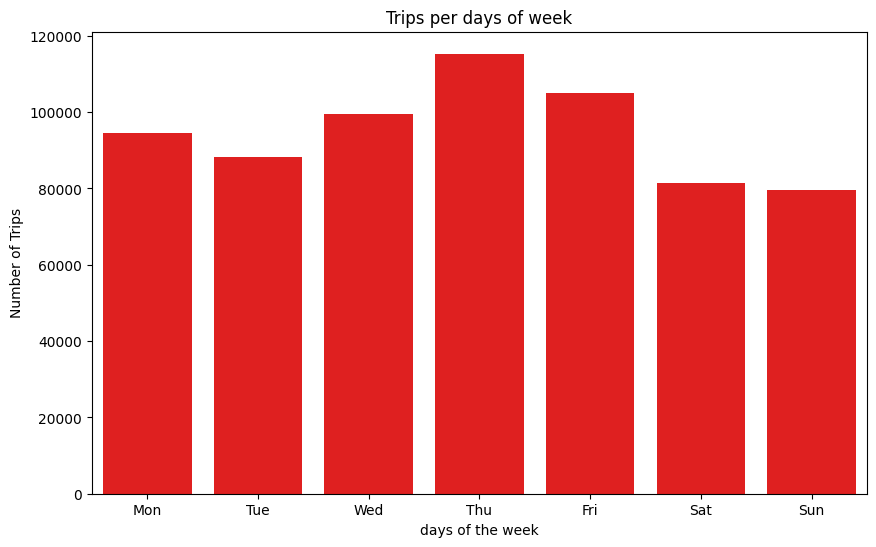

In [24]:
plt.figure(figsize=(10,6))
sns.countplot(x='jundayofweek',data=jundata,color='red')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.title('Trips per days of week')
plt.xlabel('days of the week')
plt.ylabel('Number of Trips')
plt.show()

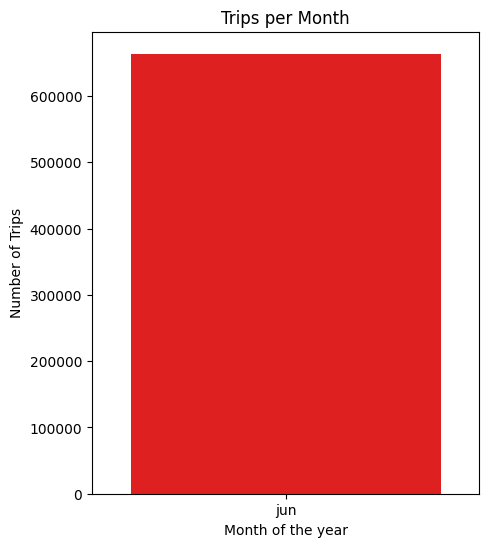

In [25]:
plt.figure(figsize=(5,6))
sns.countplot(x='junmonth',data=jundata,color='red')
plt.xticks(ticks=range(1), labels=['jun'])
plt.title('Trips per Month')
plt.xlabel('Month of the year')
plt.ylabel('Number of Trips')
plt.show()

# Model Training and Evaluation

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best CV Score (MSE): 20179.120075
Mean Squared Error (MSE): 19414.23725208333
R² Score: 0.9314444980037976
Mean Absolute Error (MAE): 88.63493055555556


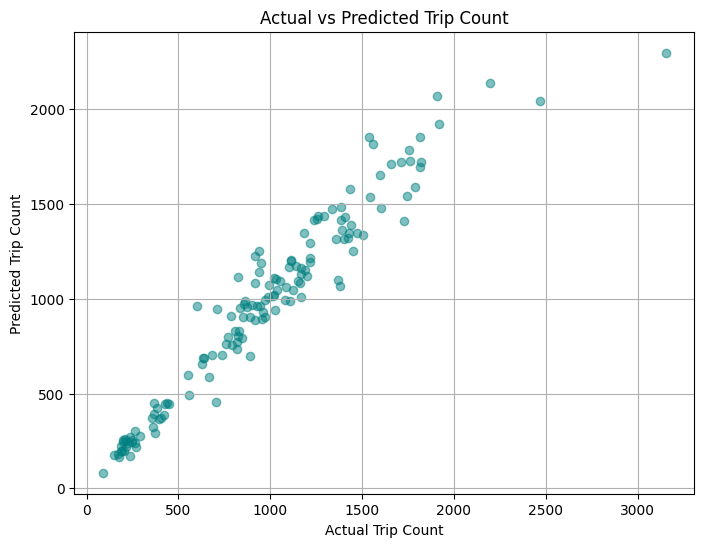

C:\Users\ARJAV JAIN\AppData\Local\Temp\ipykernel_864\29894220.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances.values, y=feature_importances.index, palette="viridis")


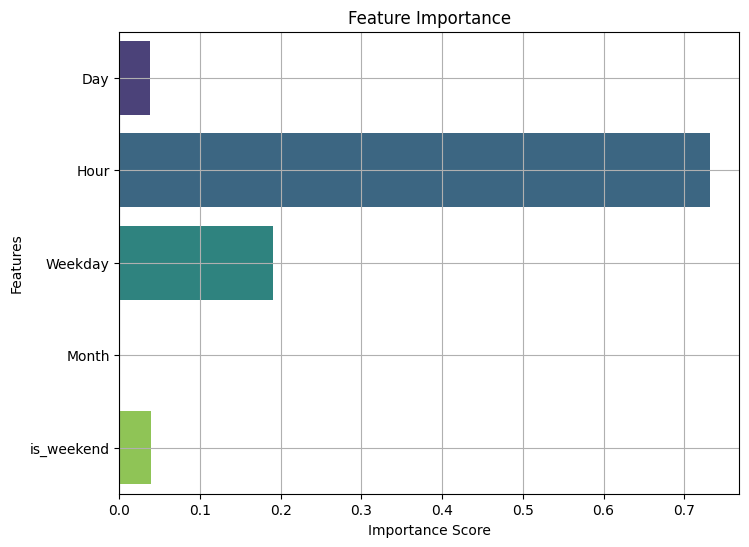

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Load dataset
df = pd.read_csv("uber-raw-data-jun14.csv")

# Parse datetime and create features
df['Date/Time'] = pd.to_datetime(df['Date/Time'])
df['Hour'] = df['Date/Time'].dt.hour
df['Weekday'] = df['Date/Time'].dt.weekday
df['Day'] = df['Date/Time'].dt.day
df['Month'] = df['Date/Time'].dt.month
df['is_weekend'] = df['Weekday'].apply(lambda x: 1 if x >= 5 else 0)

# Aggregate trip counts
grouped = df.groupby(['Day', 'Hour', 'Weekday', 'Month', 'is_weekend']).size().reset_index(name='Trip_Count')

# Features and target
X = grouped[['Day', 'Hour', 'Weekday', 'Month', 'is_weekend']]
y = grouped['Trip_Count']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 15, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Random Forest with GridSearchCV
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=3, scoring='neg_mean_squared_error',
                           n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Best model
print("Best Parameters:", grid_search.best_params_)
print("Best CV Score (MSE):", -grid_search.best_score_)

best_model = grid_search.best_estimator_

# Predictions
y_pred = best_model.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)
print("Mean Absolute Error (MAE):", mae)

# Plot: Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='teal')
plt.xlabel("Actual Trip Count")
plt.ylabel("Predicted Trip Count")
plt.title("Actual vs Predicted Trip Count")
plt.grid(True)
plt.show()

# Feature Importance Plot
plt.figure(figsize=(8, 6))
feature_importances = pd.Series(best_model.feature_importances_, index=X.columns)
sns.barplot(x=feature_importances.values, y=feature_importances.index, palette="viridis")
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.grid(True)
plt.show()


# Data Preprocessing of JULY

In [26]:
juldata['date/time']=pd.to_datetime(juldata['Date/Time'])

In [27]:
juldata['julhour']=juldata['date/time'].dt.hour
juldata['julday']=juldata['date/time'].dt.day
juldata['juldayofweek']=juldata['date/time'].dt.dayofweek
juldata['julmonth']=juldata['date/time'].dt.month

In [28]:
print(juldata.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 796121 entries, 0 to 796120
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Date/Time     796121 non-null  object        
 1   Lat           796121 non-null  float64       
 2   Lon           796121 non-null  float64       
 3   Base          796121 non-null  object        
 4   date/time     796121 non-null  datetime64[ns]
 5   julhour       796121 non-null  int32         
 6   julday        796121 non-null  int32         
 7   juldayofweek  796121 non-null  int32         
 8   julmonth      796121 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(4), object(2)
memory usage: 42.5+ MB
None


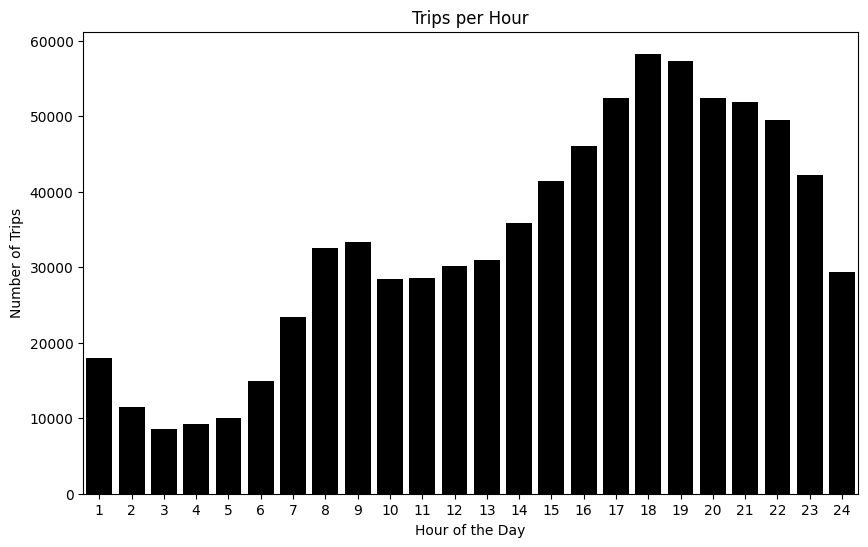

In [29]:
plt.figure(figsize=(10,6))
ax=sns.countplot(x=juldata['julhour'],color='black' )
ax.set_xticks(range(24))  
ax.set_xticklabels(range(1,25))
plt.title('Trips per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.show()

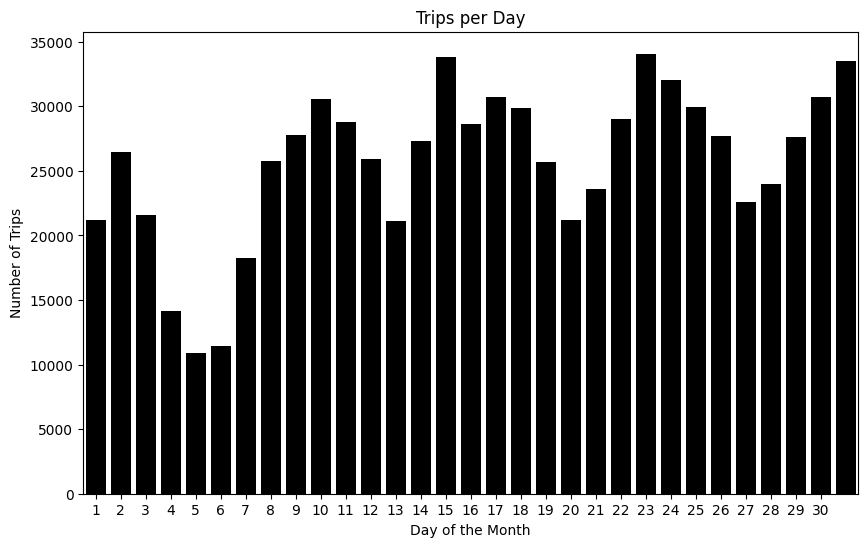

In [30]:
plt.figure(figsize=(10,6))
sns.countplot(x='julday',data=juldata,color='black')
plt.xticks(ticks=range(0, 30), labels=map(str, range(1, 31)))
plt.title('Trips per Day')
plt.xlabel('Day of the Month')
plt.ylabel('Number of Trips')
plt.show()

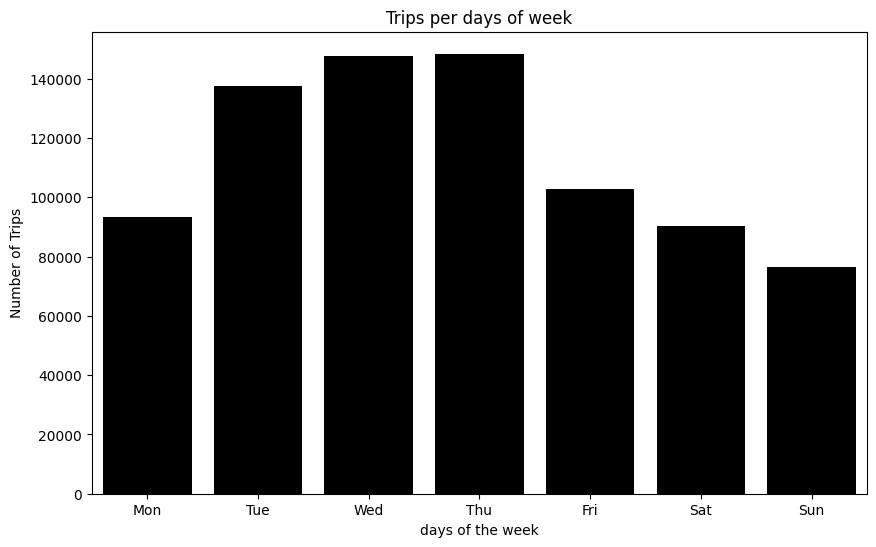

In [31]:
plt.figure(figsize=(10,6))
sns.countplot(x='juldayofweek',data=juldata,color='black')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.title('Trips per days of week')
plt.xlabel('days of the week')
plt.ylabel('Number of Trips')
plt.show()

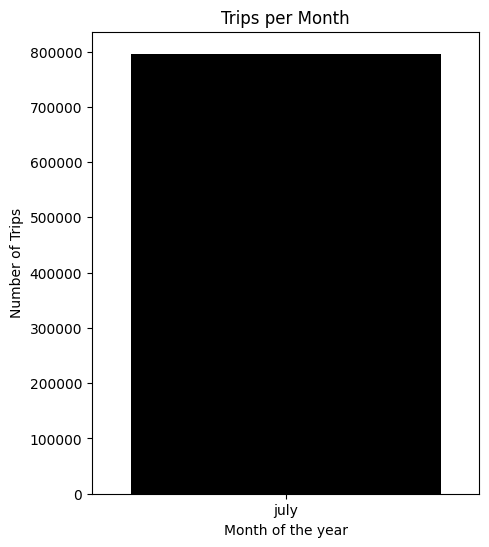

In [32]:
plt.figure(figsize=(5,6))
sns.countplot(x='julmonth',data=juldata,color='black')
plt.xticks(ticks=range(1), labels=['july'])
plt.title('Trips per Month')
plt.xlabel('Month of the year')
plt.ylabel('Number of Trips')
plt.show()

# Model Training and Evaluation

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best CV Score (MSE): 27707.203833477357
Mean Squared Error (MSE): 19774.425832046978
R² Score: 0.9526454866768774
Mean Absolute Error (MAE): 90.72520134228188


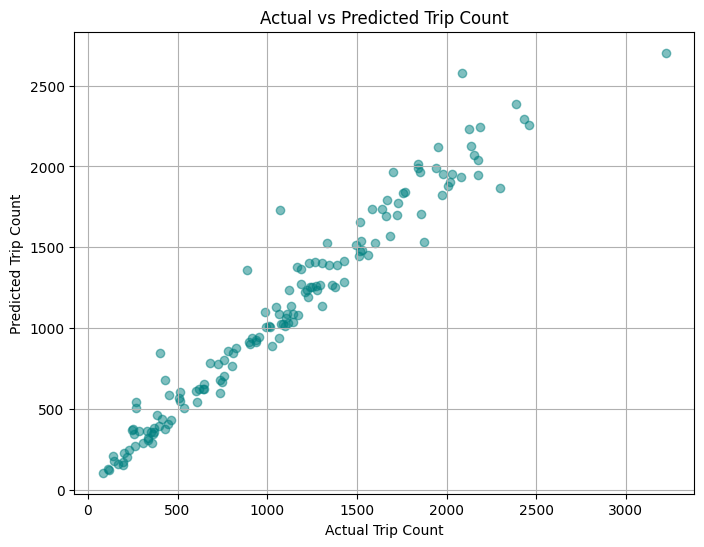

C:\Users\ARJAV JAIN\AppData\Local\Temp\ipykernel_864\1661725036.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances.values, y=feature_importances.index, palette="viridis")


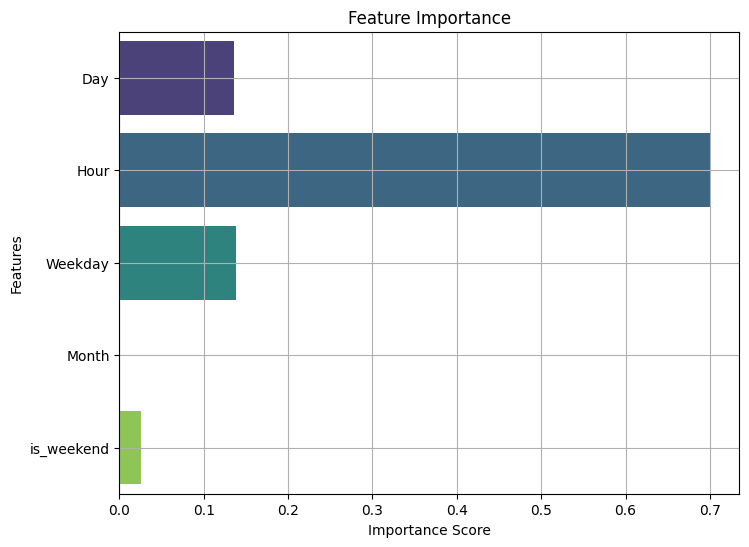

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Load dataset
df = pd.read_csv("uber-raw-data-jul14.csv")

# Parse datetime and create features
df['Date/Time'] = pd.to_datetime(df['Date/Time'])
df['Hour'] = df['Date/Time'].dt.hour
df['Weekday'] = df['Date/Time'].dt.weekday
df['Day'] = df['Date/Time'].dt.day
df['Month'] = df['Date/Time'].dt.month
df['is_weekend'] = df['Weekday'].apply(lambda x: 1 if x >= 5 else 0)

# Aggregate trip counts
grouped = df.groupby(['Day', 'Hour', 'Weekday', 'Month', 'is_weekend']).size().reset_index(name='Trip_Count')

# Features and target
X = grouped[['Day', 'Hour', 'Weekday', 'Month', 'is_weekend']]
y = grouped['Trip_Count']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 15, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Random Forest with GridSearchCV
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=3, scoring='neg_mean_squared_error',
                           n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Best model
print("Best Parameters:", grid_search.best_params_)
print("Best CV Score (MSE):", -grid_search.best_score_)

best_model = grid_search.best_estimator_

# Predictions
y_pred = best_model.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)
print("Mean Absolute Error (MAE):", mae)

# Plot: Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='teal')
plt.xlabel("Actual Trip Count")
plt.ylabel("Predicted Trip Count")
plt.title("Actual vs Predicted Trip Count")
plt.grid(True)
plt.show()

# Feature Importance Plot
plt.figure(figsize=(8, 6))
feature_importances = pd.Series(best_model.feature_importances_, index=X.columns)
sns.barplot(x=feature_importances.values, y=feature_importances.index, palette="viridis")
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.grid(True)
plt.show()


# Data Preprocessing of AUGUST

In [33]:
augdata['date/time']=pd.to_datetime(augdata['Date/Time'])

In [34]:
augdata['aughour']=augdata['date/time'].dt.hour
augdata['augday']=augdata['date/time'].dt.day
augdata['augdayofweek']=augdata['date/time'].dt.dayofweek
augdata['augmonth']=augdata['date/time'].dt.month

In [35]:
print(augdata.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829275 entries, 0 to 829274
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Date/Time     829275 non-null  object        
 1   Lat           829275 non-null  float64       
 2   Lon           829275 non-null  float64       
 3   Base          829275 non-null  object        
 4   date/time     829275 non-null  datetime64[ns]
 5   aughour       829275 non-null  int32         
 6   augday        829275 non-null  int32         
 7   augdayofweek  829275 non-null  int32         
 8   augmonth      829275 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(4), object(2)
memory usage: 44.3+ MB
None


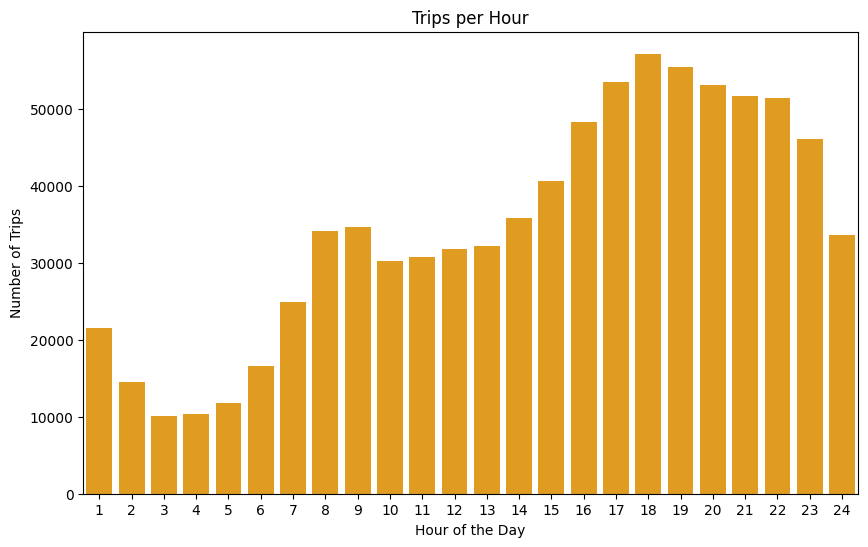

In [36]:
plt.figure(figsize=(10,6))
ax=sns.countplot(x=augdata['aughour'],color='orange' )
ax.set_xticks(range(24))  
ax.set_xticklabels(range(1,25))
plt.title('Trips per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.show()

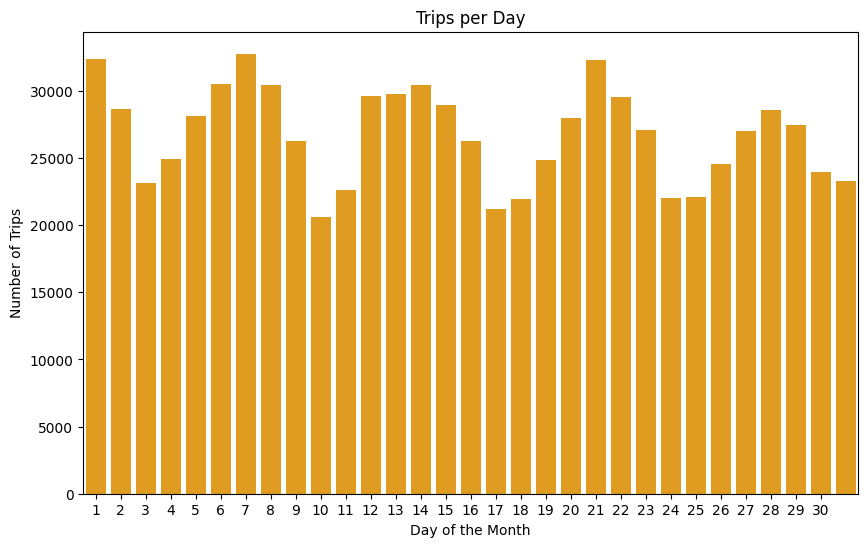

In [37]:
plt.figure(figsize=(10,6))
sns.countplot(x='augday',data=augdata,color='orange')
plt.xticks(ticks=range(0, 30), labels=map(str, range(1, 31)))
plt.title('Trips per Day')
plt.xlabel('Day of the Month')
plt.ylabel('Number of Trips')
plt.show()

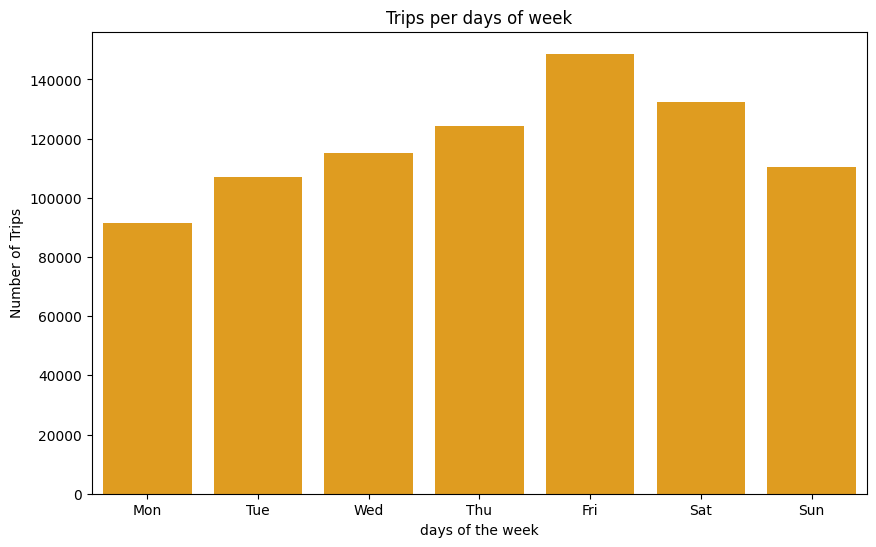

In [38]:
plt.figure(figsize=(10,6))
sns.countplot(x='augdayofweek',data=augdata,color='orange')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.title('Trips per days of week')
plt.xlabel('days of the week')
plt.ylabel('Number of Trips')
plt.show()

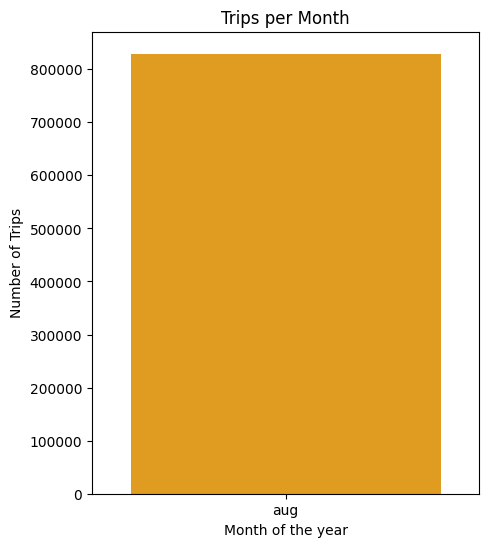

In [39]:
plt.figure(figsize=(5,6))
sns.countplot(x='augmonth',data=augdata,color='orange')
plt.xticks(ticks=range(1), labels=['aug'])
plt.title('Trips per Month')
plt.xlabel('Month of the year')
plt.ylabel('Number of Trips')
plt.show()

# Model Training and Evaluation

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best CV Score (MSE): 12813.264197845923
Mean Squared Error (MSE): 8870.495696140937
R² Score: 0.9684853143023615
Mean Absolute Error (MAE): 66.04687919463088


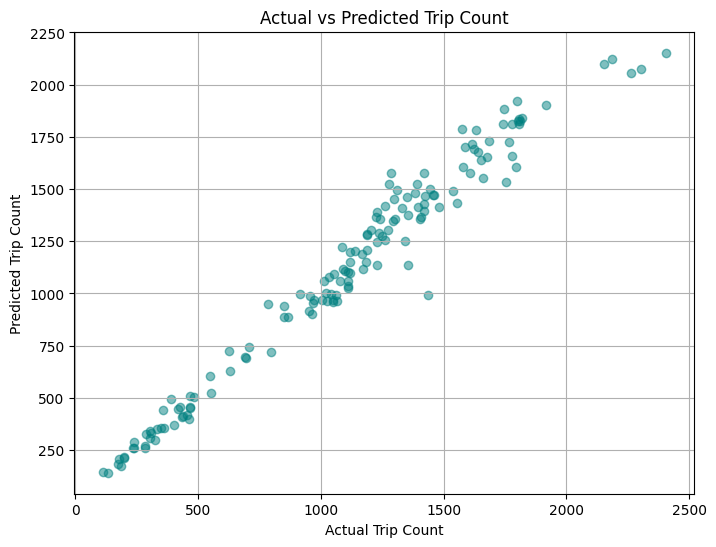

C:\Users\ARJAV JAIN\AppData\Local\Temp\ipykernel_864\418550227.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances.values, y=feature_importances.index, palette="viridis")


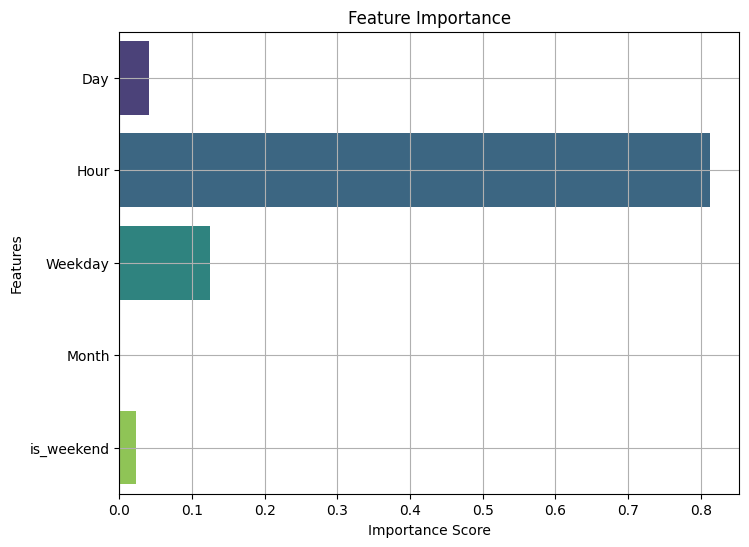

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Load dataset
df = pd.read_csv("uber-raw-data-aug14.csv")

# Parse datetime and create features
df['Date/Time'] = pd.to_datetime(df['Date/Time'])
df['Hour'] = df['Date/Time'].dt.hour
df['Weekday'] = df['Date/Time'].dt.weekday
df['Day'] = df['Date/Time'].dt.day
df['Month'] = df['Date/Time'].dt.month
df['is_weekend'] = df['Weekday'].apply(lambda x: 1 if x >= 5 else 0)

# Aggregate trip counts
grouped = df.groupby(['Day', 'Hour', 'Weekday', 'Month', 'is_weekend']).size().reset_index(name='Trip_Count')

# Features and target
X = grouped[['Day', 'Hour', 'Weekday', 'Month', 'is_weekend']]
y = grouped['Trip_Count']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 15, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Random Forest with GridSearchCV
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=3, scoring='neg_mean_squared_error',
                           n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Best model
print("Best Parameters:", grid_search.best_params_)
print("Best CV Score (MSE):", -grid_search.best_score_)

best_model = grid_search.best_estimator_

# Predictions
y_pred = best_model.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)
print("Mean Absolute Error (MAE):", mae)

# Plot: Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='teal')
plt.xlabel("Actual Trip Count")
plt.ylabel("Predicted Trip Count")
plt.title("Actual vs Predicted Trip Count")
plt.grid(True)
plt.show()

# Feature Importance Plot
plt.figure(figsize=(8, 6))
feature_importances = pd.Series(best_model.feature_importances_, index=X.columns)
sns.barplot(x=feature_importances.values, y=feature_importances.index, palette="viridis")
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.grid(True)
plt.show()


# Data Preprocessing of SEPTEMBER

In [40]:
sepdata['date/time']=pd.to_datetime(sepdata['Date/Time'])

In [41]:
sepdata['sephour']=sepdata['date/time'].dt.hour
sepdata['sepday']=sepdata['date/time'].dt.day
sepdata['sepdayofweek']=sepdata['date/time'].dt.dayofweek
sepdata['sepmonth']=sepdata['date/time'].dt.month

In [42]:
print(sepdata.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028136 entries, 0 to 1028135
Data columns (total 9 columns):
 #   Column        Non-Null Count    Dtype         
---  ------        --------------    -----         
 0   Date/Time     1028136 non-null  object        
 1   Lat           1028136 non-null  float64       
 2   Lon           1028136 non-null  float64       
 3   Base          1028136 non-null  object        
 4   date/time     1028136 non-null  datetime64[ns]
 5   sephour       1028136 non-null  int32         
 6   sepday        1028136 non-null  int32         
 7   sepdayofweek  1028136 non-null  int32         
 8   sepmonth      1028136 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(4), object(2)
memory usage: 54.9+ MB
None


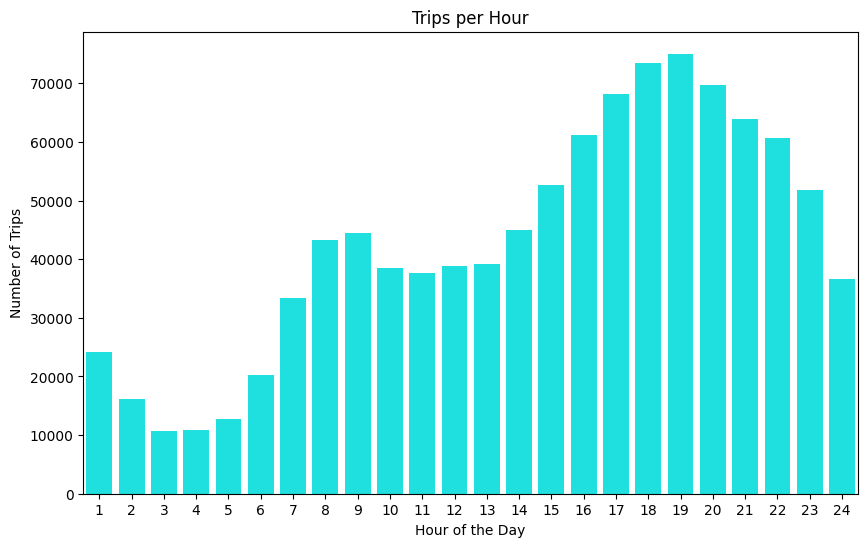

In [43]:
plt.figure(figsize=(10,6))
ax=sns.countplot(x=sepdata['sephour'],color='cyan' )
ax.set_xticks(range(24))  
ax.set_xticklabels(range(1,25))
plt.title('Trips per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.show()

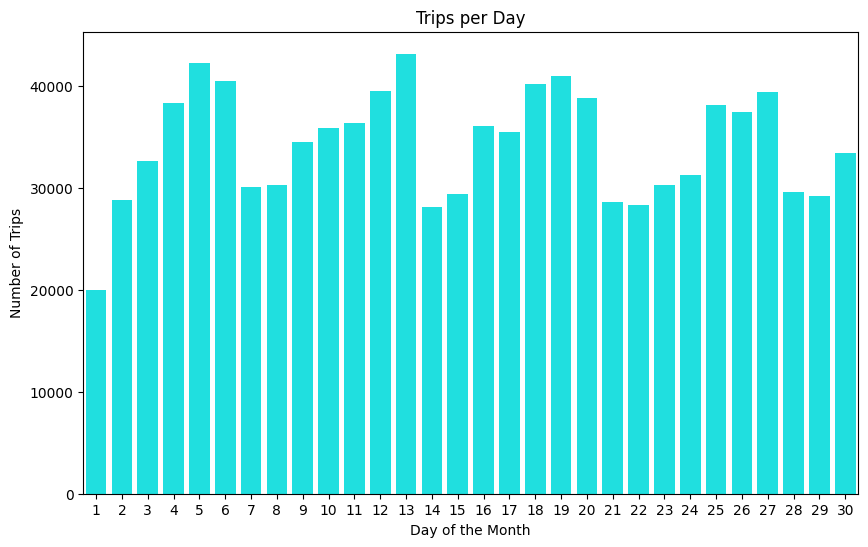

In [44]:
plt.figure(figsize=(10,6))
sns.countplot(x='sepday',data=sepdata,color='cyan')
plt.xticks(ticks=range(0, 30), labels=map(str, range(1, 31)))
plt.title('Trips per Day')
plt.xlabel('Day of the Month')
plt.ylabel('Number of Trips')
plt.show()

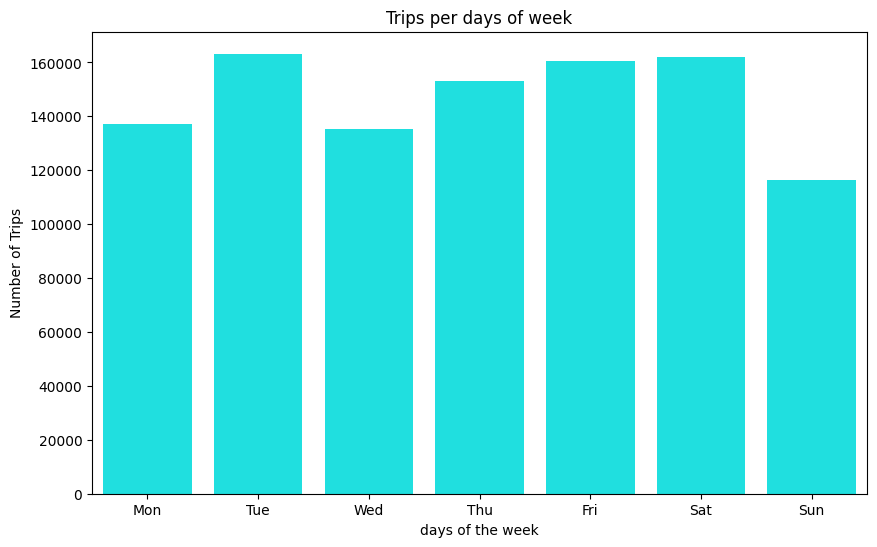

In [45]:
plt.figure(figsize=(10,6))
sns.countplot(x='sepdayofweek',data=sepdata,color='cyan')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.title('Trips per days of week')
plt.xlabel('days of the week')
plt.ylabel('Number of Trips')
plt.show()

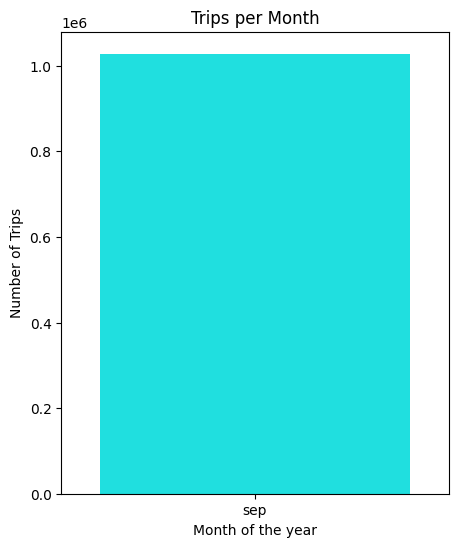

In [46]:
plt.figure(figsize=(5,6))
sns.countplot(x='sepmonth',data=sepdata,color='cyan')
plt.xticks(ticks=range(1), labels=['sep'])
plt.title('Trips per Month')
plt.xlabel('Month of the year')
plt.ylabel('Number of Trips')
plt.show()

# Model Training and Evaluation

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best CV Score (MSE): 32048.769202810505
Mean Squared Error (MSE): 22119.96947361111
R² Score: 0.9621788453111814
Mean Absolute Error (MAE): 95.83624999999999


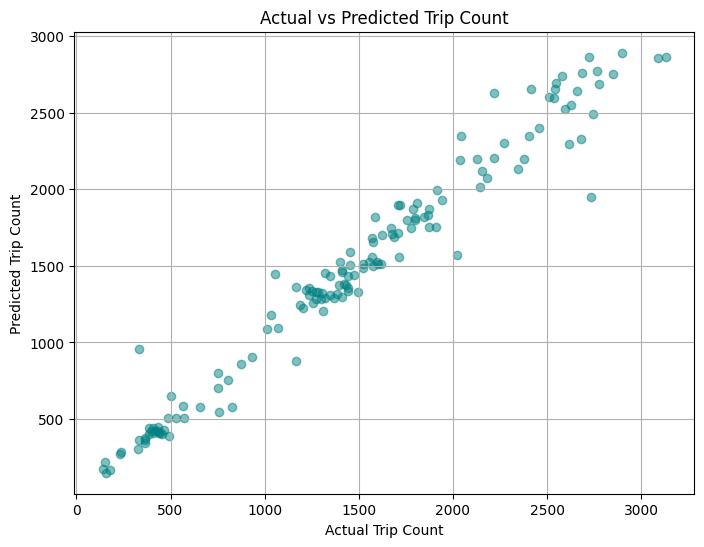

C:\Users\ARJAV JAIN\AppData\Local\Temp\ipykernel_864\4161084114.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances.values, y=feature_importances.index, palette="viridis")


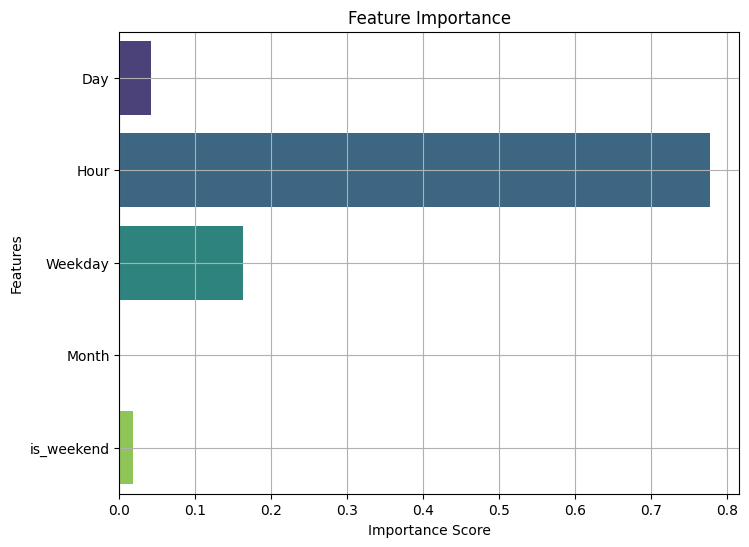

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Load dataset
df = pd.read_csv("uber-raw-data-sep14.csv")

# Parse datetime and create features
df['Date/Time'] = pd.to_datetime(df['Date/Time'])
df['Hour'] = df['Date/Time'].dt.hour
df['Weekday'] = df['Date/Time'].dt.weekday
df['Day'] = df['Date/Time'].dt.day
df['Month'] = df['Date/Time'].dt.month
df['is_weekend'] = df['Weekday'].apply(lambda x: 1 if x >= 5 else 0)

# Aggregate trip counts
grouped = df.groupby(['Day', 'Hour', 'Weekday', 'Month', 'is_weekend']).size().reset_index(name='Trip_Count')

# Features and target
X = grouped[['Day', 'Hour', 'Weekday', 'Month', 'is_weekend']]
y = grouped['Trip_Count']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 15, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Random Forest with GridSearchCV
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=3, scoring='neg_mean_squared_error',
                           n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Best model
print("Best Parameters:", grid_search.best_params_)
print("Best CV Score (MSE):", -grid_search.best_score_)

best_model = grid_search.best_estimator_

# Predictions
y_pred = best_model.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)
print("Mean Absolute Error (MAE):", mae)

# Plot: Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='teal')
plt.xlabel("Actual Trip Count")
plt.ylabel("Predicted Trip Count")
plt.title("Actual vs Predicted Trip Count")
plt.grid(True)
plt.show()

# Feature Importance Plot
plt.figure(figsize=(8, 6))
feature_importances = pd.Series(best_model.feature_importances_, index=X.columns)
sns.barplot(x=feature_importances.values, y=feature_importances.index, palette="viridis")
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.grid(True)
plt.show()
